In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Sts-Ups1cdu5P8CUnqIDdAD2fMx3MZUD
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1Sts-Ups1cdu5P8CUnqIDdAD2fMx3MZUD
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 19.5MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def convertImageToBinary(path, threshold=200):
    """
    Convert an image to a binary representation (white as -1, black as 1).

    Args:
        path (str): Path to the image file.
        threshold (int): Intensity threshold for binary conversion (default: 128).

    Returns:
        np.ndarray: Binary representation of the image.
    """
    # Load image and convert to grayscale
    image = Image.open(path).convert('L')  # 'L' converts to grayscale

    # Convert image to numpy array
    image_array = np.array(image)

    # Apply threshold to create binary representation
    binary_image = np.where(image_array > threshold, 1, -1)

    return binary_image

In [4]:
image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]
def generateNoisyImages():
    # List of image file paths



    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)


def getNoisyBinaryImage(input_path, output_path, noise_level=50):
    """
    Add random noise to an image and save the noisy version.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the noisy image.
        noise_level (int): Maximum noise level to add (default: 50).
    """
    # Load image
    image = Image.open(input_path)

    # Convert image to numpy array
    image_array = np.array(image, dtype=np.int16)  # Use int16 to prevent overflow


    # Generate random noise
    noise = np.random.randint(-noise_level, noise_level + 1, image_array.shape, dtype=np.int16)

    # Add noise and clip values to valid range (0-255)
    noisy_image_array = np.clip(image_array + noise, 0, 255).astype(np.uint8)

    # Convert back to image and save
    noisy_image = Image.fromarray(noisy_image_array)
    noisy_image.save(output_path)

generateNoisyImages()

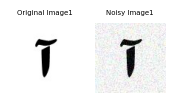

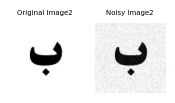

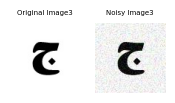

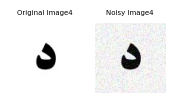

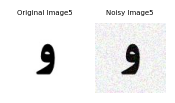

In [5]:
for i, image_path in enumerate(image_paths, start=1):
      binary_data = convertImageToBinary(f'/content/{i}.jpg')
      original_image = Image.open(f'/content/{i}.jpg')
      noisy_image = Image.open(f'/content/noisy{i}.jpg')

      fig, axes = plt.subplots(1, 2, figsize=(2, 1))

      axes[0].imshow(original_image)
      axes[0].set_title(f'Original Image{i}', fontsize=5)
      axes[0].axis('off')

      axes[1].imshow(noisy_image)
      axes[1].set_title(f'Noisy Image{i}', fontsize=5)
      axes[1].axis('off')

      plt.show()

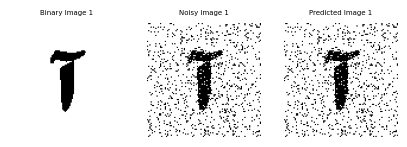

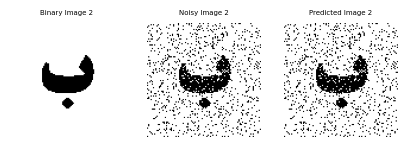

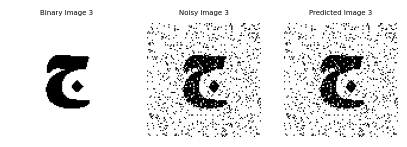

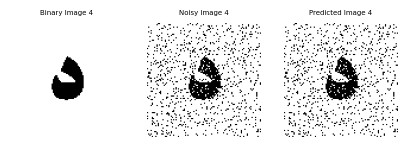

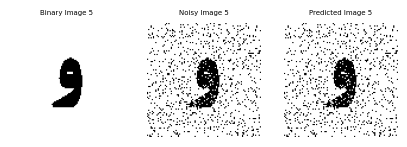

In [6]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        """
        Train the Hopfield network with binary patterns.
        """
        for pattern in patterns:
            pattern = pattern.flatten()  # تبدیل به آرایه یک‌بعدی
            self.weights += np.outer(pattern, pattern)
        # نرمال‌سازی وزن‌ها
        self.weights /= len(patterns)
        # حذف خوداتصالی‌ها
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern, steps=50):
        """
        Predict the output by iteratively updating the pattern.
        """
        pattern = pattern.flatten()
        for _ in range(steps):  # افزایش مراحل همگرایی
            previous_pattern = pattern.copy()
            for i in range(self.size):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
                if np.all(pattern == previous_pattern):
                    break
        return pattern.reshape((int(np.sqrt(self.size)), int(np.sqrt(self.size))))



def train_and_predict(image_paths):
    """
    Train and test the Hopfield network on a set of binary images.
    """
    # تبدیل تصاویر به باینری
    patterns = [convertImageToBinary(image_path) for image_path in image_paths]

    # ایجاد و آموزش شبکه هافیلد
    size = patterns[0].size
    hopfield = HopfieldNetwork(size)
    hopfield.train(patterns)

    for i, image_path in enumerate(image_paths, start=1):
        binary_image = convertImageToBinary(image_path)

        # ایجاد تصویر نویزی
        noisy_image = binary_image.copy()
        noise = np.random.choice([1, -1], size=binary_image.shape, p=[0.9, 0.1])
        noisy_image = np.multiply(binary_image, noise)

        # پیش‌بینی تصویر اصلاح‌شده
        predicted_image = hopfield.predict(noisy_image, steps=100)

        # نمایش نتایج
        fig, axes = plt.subplots(1, 3, figsize=(5, 2))

        # تصویر اصلی
        axes[0].imshow(binary_image, cmap='gray', vmin=-1, vmax=1)
        axes[0].set_title(f"Binary Image {i}",fontsize=5)
        axes[0].axis('off')

        # تصویر نویزی
        axes[1].imshow(noisy_image, cmap='gray', vmin=-1, vmax=1)
        axes[1].set_title(f"Noisy Image {i}", fontsize=5)
        axes[1].axis('off')

        # تصویر پیش‌بینی شده
        axes[2].imshow(predicted_image, cmap='gray', vmin=-1, vmax=1)
        axes[2].set_title(f"Predicted Image {i}", fontsize=5)
        axes[2].axis('off')

        plt.show()

# نمایش و پیش‌بینی تصاویر
train_and_predict(image_paths)


In [7]:
import numpy as np

def generate_missing_points(data, missing_fraction=0.1):

    data_with_missing = data.copy()

    # تعداد نقاطی که باید گمشده شوند
    total_points = data.size
    num_missing_points = int(total_points * missing_fraction)

    # انتخاب ایندکس‌های تصادفی برای نقاط گمشده
    missing_indices = np.random.choice(total_points, num_missing_points, replace=False)

    # تنظیم نقاط گمشده به مقدار ۰ یا NaN
    data_with_missing.flat[missing_indices] = 0  # یا np.nan برای داده‌های واقعی

    return data_with_missing


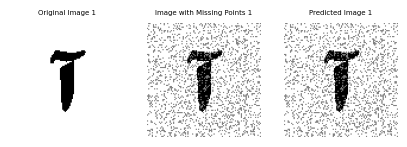

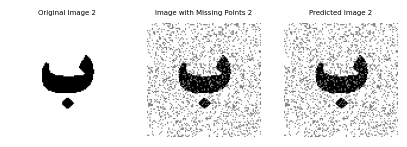

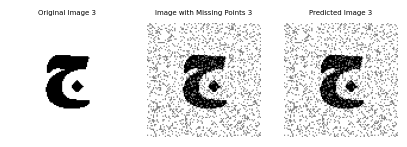

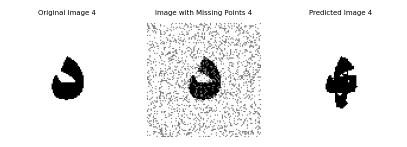

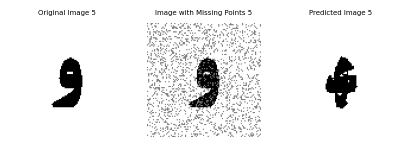

In [8]:
def train_and_predict(image_paths):
    """
    Train and test the Hopfield network on a set of binary images.
    """
    # تبدیل تصاویر به باینری
    patterns = [convertImageToBinary(image_path) for image_path in image_paths]

    # ایجاد و آموزش شبکه هافیلد
    size = patterns[0].size
    hopfield = HopfieldNetwork(size)
    hopfield.train(patterns)

    for i, image_path in enumerate(image_paths, start=1):
        binary_image = convertImageToBinary(image_path)

        data_with_missing = generate_missing_points(binary_image, missing_fraction=0.2)

                # پیش‌بینی تصویر اصلاح‌شده
        predicted_image = hopfield.predict(data_with_missing, steps=150)

        # نمایش نتایج
        fig, axes = plt.subplots(1, 3, figsize=(5, 3))

        # تصویر اصلی
        axes[0].imshow(binary_image, cmap='gray', vmin=-1, vmax=1)
        axes[0].set_title(f"Original Image {i}", fontsize=5)
        axes[0].axis('off')

        # تصویر با نقاط گم‌شده
        axes[1].imshow(data_with_missing, cmap='gray', vmin=-1, vmax=1)
        axes[1].set_title(f"Image with Missing Points {i}", fontsize=5)
        axes[1].axis('off')

        # تصویر پیش‌بینی‌شده
        axes[2].imshow(predicted_image, cmap='gray')
        axes[2].set_title(f"Predicted Image {i}", fontsize=5)
        axes[2].axis('off')



# نمایش و پیش‌بینی تصاویر
train_and_predict(image_paths)